In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from itertools import chain
from collections import Counter
import string
import random
from itertools import islice
import json


import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from transformers import pipeline
import pickle

### Define Functions

In [2]:
class keyword_analysis:
    
    def __init__(self, data):
        self.data = data
        
    def passages(self, podcast):
        if podcast == 'all':
            temp_df = self.data
        else:
            temp_df = self.data[self.data['Podcast'] == podcast]
        flattened_passages = list(chain.from_iterable(temp_df['Passages']))
    
        return flattened_passages
        
    def generate_freq(self, corpus):
        translator = str.maketrans("","" , string.punctuation)
        corpus_processed = corpus.translate(translator)
        
        unigrams_temp = [word.lower() for word in nltk.word_tokenize(corpus_processed)]
        
        bigrams = list(ngrams(unigrams_temp, 2))
        bigram_freq = dict(Counter(bigrams))
        
        stop_words = set(stopwords.words('english'))
        unigrams = [word for word in unigrams_temp if word not in stop_words]
        unigram_freq = dict(Counter(unigrams))
        
        sorted_unigrams = dict(sorted(unigram_freq.items(), key=lambda item: item[1],reverse=True))
        sorted_bigrams = dict(sorted(bigram_freq.items(), key=lambda item: item[1], reverse=True))
        
        return sorted_unigrams, sorted_bigrams
    
    def run_analysis(self, podcast, anti_words):
    
        podcast_passages = self.passages(podcast)
        corpus = ' '.join(podcast_passages)

        frequencies = self.generate_freq(corpus)
        unigrams = frequencies[0]
        bigrams = frequencies[1]

        neg_word = {word: unigrams.get(word, 0) for word in anti_words.keys()}

    
        return unigrams, bigrams, neg_word

    def plot_analysis(self, podcast, neg_word):
        plt.figure(figsize=(12, 8))
        plt.bar(neg_word.keys(), neg_word.values())
        plt.xlabel('Words')
        plt.ylabel('Frequency')
        plt.title('Top 10 Antipathy Words')
        plt.xticks(rotation='vertical')
        plt.show()
        
        filename = 'Podcast/' + str(podcast) + '_antiwords.png'
        plt.savefig(filename)

### Top antipathy words

In [3]:
podcast_data = pd.read_pickle('Podcast/podcast_data_processed.pkl')
podcast_data

,Podcast,Date,Part,Transcript,Passages
0,Conservative_Review_with_Daniel_Horowitz,2022-05-12,1,And welcome back fellow American patriots and...,[And welcome back fellow American patriots and...
2,Conservative_Review_with_Daniel_Horowitz,2022-02-10,1,"Set five years after Jedi Fallen Order, follo...","[Set five years after Jedi Fallen Order, follo..."
3,Conservative_Review_with_Daniel_Horowitz,2022-05-16,1,Politics Without the Soap Opera with unfilter...,[Politics Without the Soap Opera with unfilter...
4,Conservative_Review_with_Daniel_Horowitz,2022-09-13,1,And welcome back fellow American patriots and...,[And welcome back fellow American patriots and...
7,Conservative_Review_with_Daniel_Horowitz,2022-03-14,1,And welcome back fellow lab rats to the one a...,[And welcome back fellow lab rats to the one a...
...,...,...,...,...,...
6943,Louder_with_Crowder,2022-03-22,1,"Ahoy audio listeners, it's Dave and you're li...","[Ahoy audio listeners, it's Dave and you're li..."
6945,Louder_with_Crowder,2022-09-06,14,"You're running for press, you socialist cheat...","[You're running for press, you socialist cheat..."
6946,Louder_with_Crowder,2022-09-06,1,"Yeah, uh, don't get it twisted This late nigh...","[Yeah, uh, don't get it twisted This late nigh..."
6947,Louder_with_Crowder,2022-09-07,2,It's Parody Week. You can find today's track ...,[It's Parody Week. You can find today's track ...


In [4]:
podcasts =  list(podcast_data['Podcast'].unique())
podcasts

['Conservative_Review_with_Daniel_Horowitz',
 'Firebrand_with_Matt_Gaetz',
 'Bill_O_Reilly_s_No_Spin_News_and_Analysis',
 'The_Dan_Bongino_Show',
 'The_One_w_Greg_Gutfeld',
 'Bret_Weinstein_DarkHorse_Podcast',
 'The_Megyn_Kelly_Show',
 'Conversations_With_Coleman',
 'Tim_Pool_Daily_Show',
 'The_Matt_Walsh_Show',
 'Candace_Owens',
 'Mark_Levin_Podcast',
 'Verdict_with_Ted_Cruz',
 'PragerU_Five_Minute_Videos',
 'The_MeidasTouch_Podcast',
 'The_News_Why_It_Matters',
 'Get_Off_My_Lawn_Podcast_w_Gavin_McInnes',
 'Fireside_Chat_with_Dennis_Prager',
 'The_Michael_Knowles_Show',
 'The_Michael_Savage_Show',
 'The_Glenn_Beck_Program',
 'Hold_These_Truths_with_Dan_Crenshaw',
 'Bannon_s_War_Room',
 'The_New_Abnormal',
 'Human_Events_Daily_with_Jack_Posobiec',
 'The_Sean_Hannity_Show',
 'The_Jordan_B_Peterson_Podcast',
 'Rudy_Giuliani_s_Common_Sense',
 'The_Ben_Shapiro_Show',
 'The_Rubin_Report',
 'Louder_with_Crowder']

In [5]:
analysis_class = keyword_analysis(podcast_data)

In [6]:
antipathy_words = {'hate': 0, 'resent':0, 'dislike':0, 'despise':0, 'detest':0, 'loathe':0,
                   'abhor':0, 'deride':0, 'disparage':0, 'hostile':0}

In [7]:
all_neg_words = {}
for podcast in podcasts:
    uni, bi, neg_words = analysis_class.run_analysis(podcast, antipathy_words)
    all_neg_words[podcast] = neg_words

In [8]:
antipathy_df = pd.DataFrame(columns=podcasts)
antipathy_df['Words'] = antipathy_words
for podcast in podcasts:
    antipathy_df[podcast] = all_neg_words[podcast].values()

In [9]:
antipathy_df = antipathy_df.drop( columns=['Words'])
top_antipathy_df = antipathy_df.sort_values(by='hate', axis=1, ascending=False).T[:10]
top_antipathy_df

,hate,resent,dislike,despise,detest,loathe,abhor,deride,disparage,hostile
Mark_Levin_Podcast,913,6,8,83,14,4,1,0,9,62
The_Glenn_Beck_Program,860,8,14,60,0,4,0,3,5,48
The_Matt_Walsh_Show,608,10,10,22,1,3,1,0,2,30
Louder_with_Crowder,557,1,36,7,0,0,0,0,0,2
The_Michael_Knowles_Show,520,1,3,4,1,0,0,2,5,36
The_Megyn_Kelly_Show,519,15,20,8,1,9,1,0,9,40
The_Sean_Hannity_Show,503,0,22,2,0,1,1,0,1,211
Tim_Pool_Daily_Show,471,1,8,55,3,2,0,4,36,42
The_Dan_Bongino_Show,468,3,12,4,2,0,2,1,1,29
The_News_Why_It_Matters,394,3,8,8,0,0,1,0,3,15


In [12]:
antipathy_df.to_pickle('Podcast/podcast-antipathy-analysis.pkl')

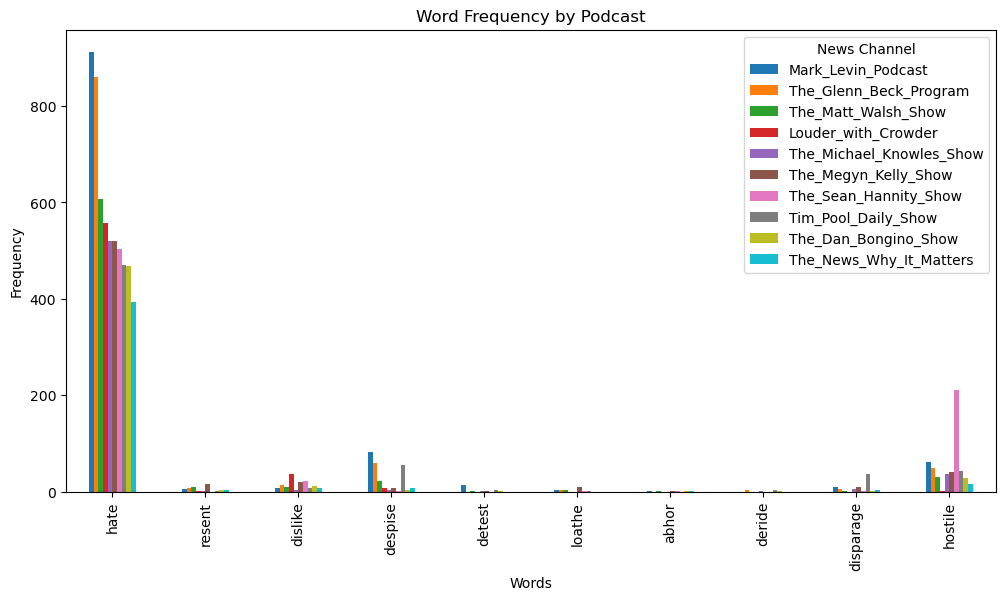

In [10]:
# Create the bar plot
ax = top_antipathy_df.T.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency by Podcast')
plt.legend(title='News Channel', loc='upper right')

# Display the plot
plt.show()

In [13]:
hate_analysis = top_antipathy_df['hate'][:10]

<BarContainer object of 10 artists>

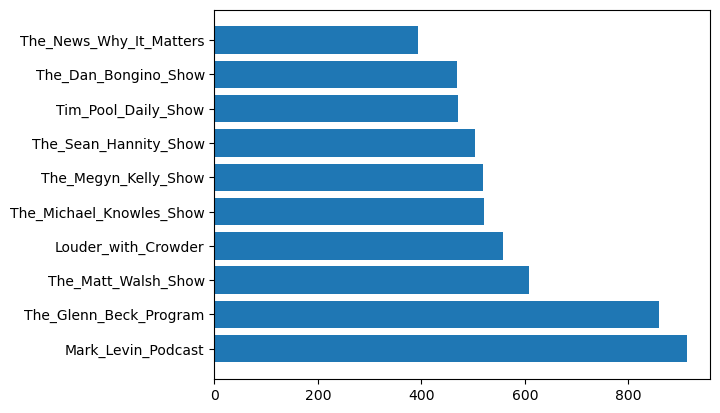

In [14]:
plt.barh(hate_analysis.index, hate_analysis.values)

### Context words analysis

In [15]:
unigrams, bigrams, negwords = analysis_class.run_analysis('all', antipathy_words)

In [16]:
podcast_uni_bi_neg = {'unigrams': unigrams, 'bigrams':bigrams, 'negwords': negwords}

In [17]:
with open('Podcast/podcast_uni_bi_neg.pkl', "wb") as file:
    pickle.dump(podcast_uni_bi_neg, file)

In [18]:
def context_word_frequencies(bigrams, target_word):
    before_words = {}
    after_words = {}

    for bigram, frequency in bigrams.items():
        if bigram[0] == target_word:
            after_words[bigram[1]] = after_words.get(bigram[1], 0) + frequency
        elif bigram[1] == target_word:
            before_words[bigram[0]] = before_words.get(bigram[0], 0) + frequency

    sorted_before_words = dict(sorted(before_words.items(), key=lambda item: item[1], reverse=True))
    sorted_after_words = dict(sorted(after_words.items(), key=lambda item: item[1], reverse=True))
    
    size = 20
    if len(sorted_before_words.items()) < 20 or len(sorted_after_words.items()) <20:
        size = min(len(sorted_before_words.items()), len(sorted_after_words.items()))
    
    top_before_words = dict(islice(sorted_before_words.items(), size))
    top_after_words = dict(islice(sorted_after_words.items(), size))
    
    return top_before_words, top_after_words, size

In [19]:
def create_context_word_dataframe(bigrams, target_word):
    before_words, after_words, size = context_word_frequencies(bigrams, target_word)
    context_words = pd.DataFrame(columns=['Before_Words', 'B_Count', 'Target_Word', 
                                          'After_Words', 'A_Count'])
    context_words['Before_Words'] = before_words.keys()
    context_words['B_Count'] = before_words.values()
    context_words['After_Words'] = after_words.keys()
    context_words['A_Count'] = after_words.values()
    context_words['Target_Word'] = [target_word for i in range(size)]
    
    return context_words

In [20]:
target_word = 'hate'

In [21]:
context_words_df_podcast = create_context_word_dataframe(bigrams, target_word)
context_words_df_podcast

,Before_Words,B_Count,Target_Word,After_Words,A_Count
0,i,2022,hate,to,866
1,they,1242,hate,the,615
2,to,526,hate,you,452
3,you,438,hate,speech,443
4,who,297,hate,it,315
5,that,290,hate,that,260
6,of,235,hate,and,252
7,a,200,hate,him,252
8,we,180,hate,crime,238
9,the,158,hate,this,224
